In [4]:
#### Car Price Linear Regression Model #####
#######  Author: Midhun Kumar #########
########## Version: 1.0 ###############

In [5]:
#Importing required Libraries for ploting and data Visualization 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Supress warnings 
import warnings
warnings.filterwarnings('ignore')

#Train_test Split Data Lib
from sklearn.model_selection import train_test_split
#Rescalling  and Required lib
from sklearn.preprocessing import MinMaxScaler

#RFE Import
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [6]:
#Importing DataFrame
carprice = pd.read_csv('../input/car-price/CarPrice_Assignment.csv')

In [7]:
#Understanding Dataframe
carprice.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
carprice.shape

(205, 26)

In [9]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
#Dropping Car_ID as its not required feature
carprice.drop('car_ID', axis = 1 ,inplace = True)

In [12]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [13]:
# Splitting the car company name from car model
companyname = carprice.CarName.str.split().str[0]

In [14]:
#Insertiing the company name in the begining of DF
carprice.insert(loc=0 ,column='CompanyName', value=companyname)

In [15]:
carprice.head(5)

,CompanyName,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
#Dropping the carName as it not required for the model or analysis
carprice.drop('CarName', axis=1, inplace=True)

In [17]:
carprice.head(5)

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [18]:
#Verify the Company name all are unique
carprice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
#We need to Merge few company Names to singlen name as they are having differnt in speeling
carprice['CompanyName'] = carprice['CompanyName'].replace ({"maxda":"mazda","Nisson":"nissan","porcshce":"porsche","vokswagen":"volkswagen","vw":"volkswagen","toyouta":"toyota"})

In [20]:
carprice['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
carprice.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### 

#### So far we able to understand data, dropped some unwanted coloumns and added Company_name columns
by spliiting the Car model

# Data Visualizion 

<AxesSubplot:>

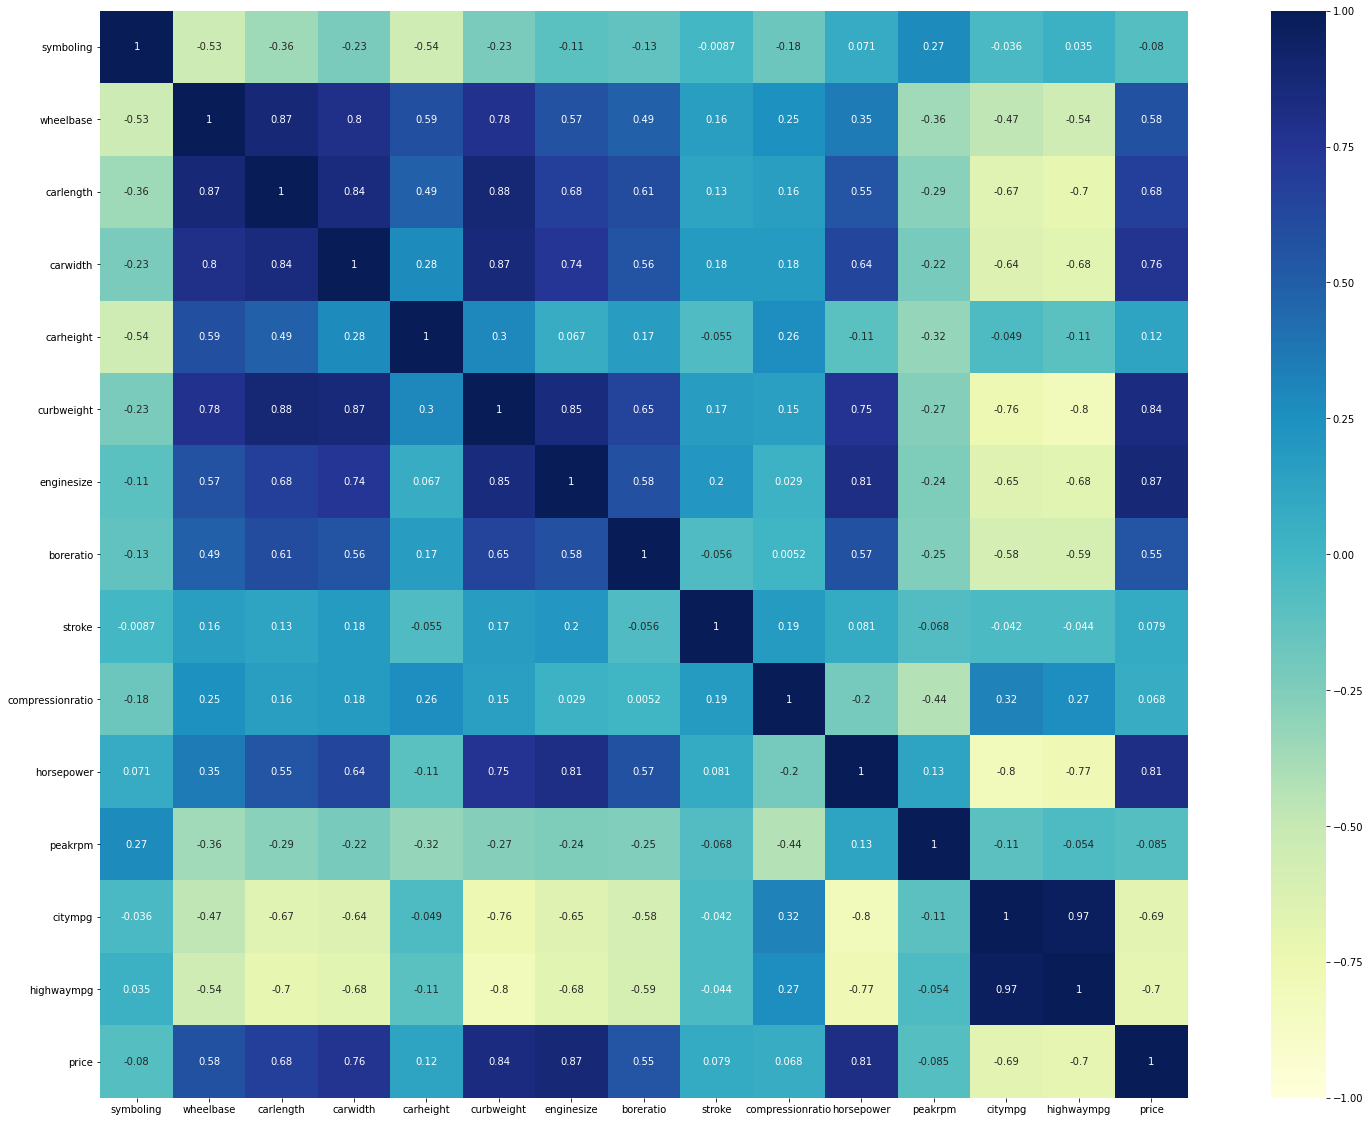

In [23]:
# Checking the correaltion betwen all the numeric columns
plt.figure(figsize=(30,20))
sns.heatmap(carprice.corr(),annot=True ,square=True, cmap="YlGnBu",vmax=1,vmin=-1)


### From above Heatmap we can see below points
    1. Price Higly correalted with Curbweight, Engine Size, Horse Power and medium correation with Wheel_base Boreratio and car_length
    2. Price has negitively correalted to Symploing,Citympg,hihwayMpg and rest has low correaltion

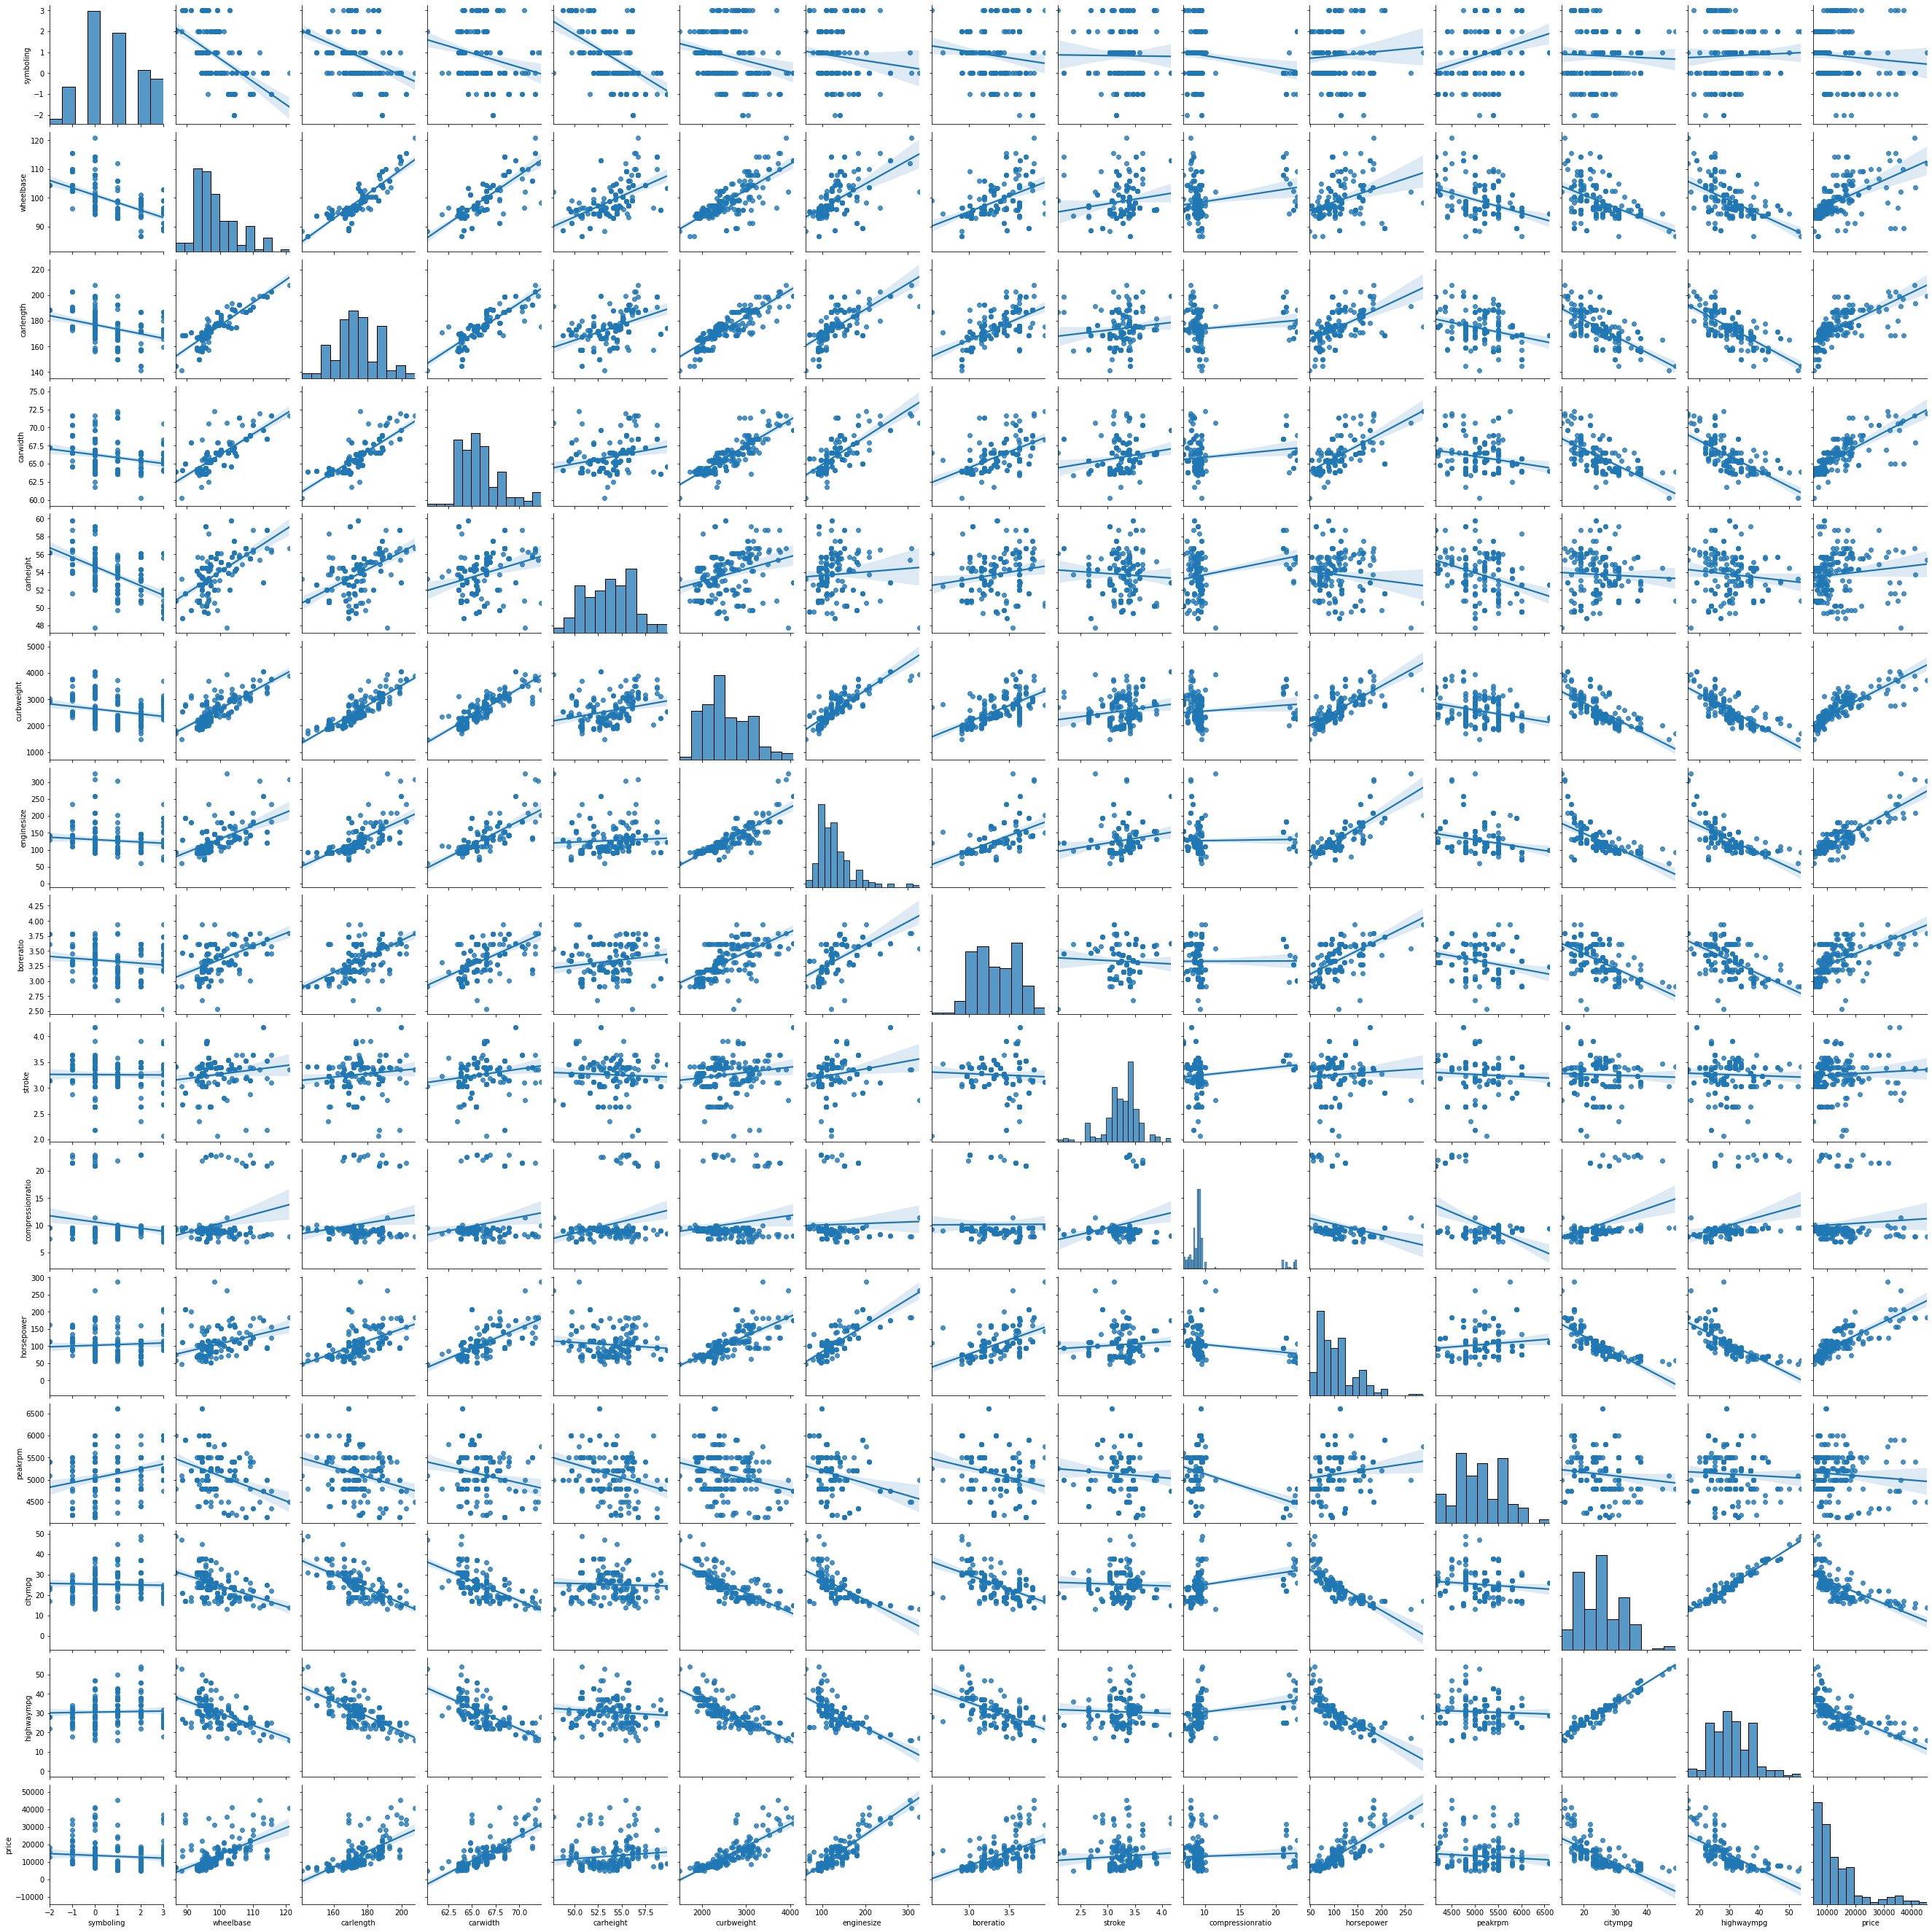

In [24]:
#Creating Pair plt for numeric Values 
sns.pairplot(carprice,kind="reg")

### From above Heat we can see below points

    1. Price has high linear correaltion with following features curbweight, Engine Size, Horse Power, Wheel_base Boreratio and car_length

In [25]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

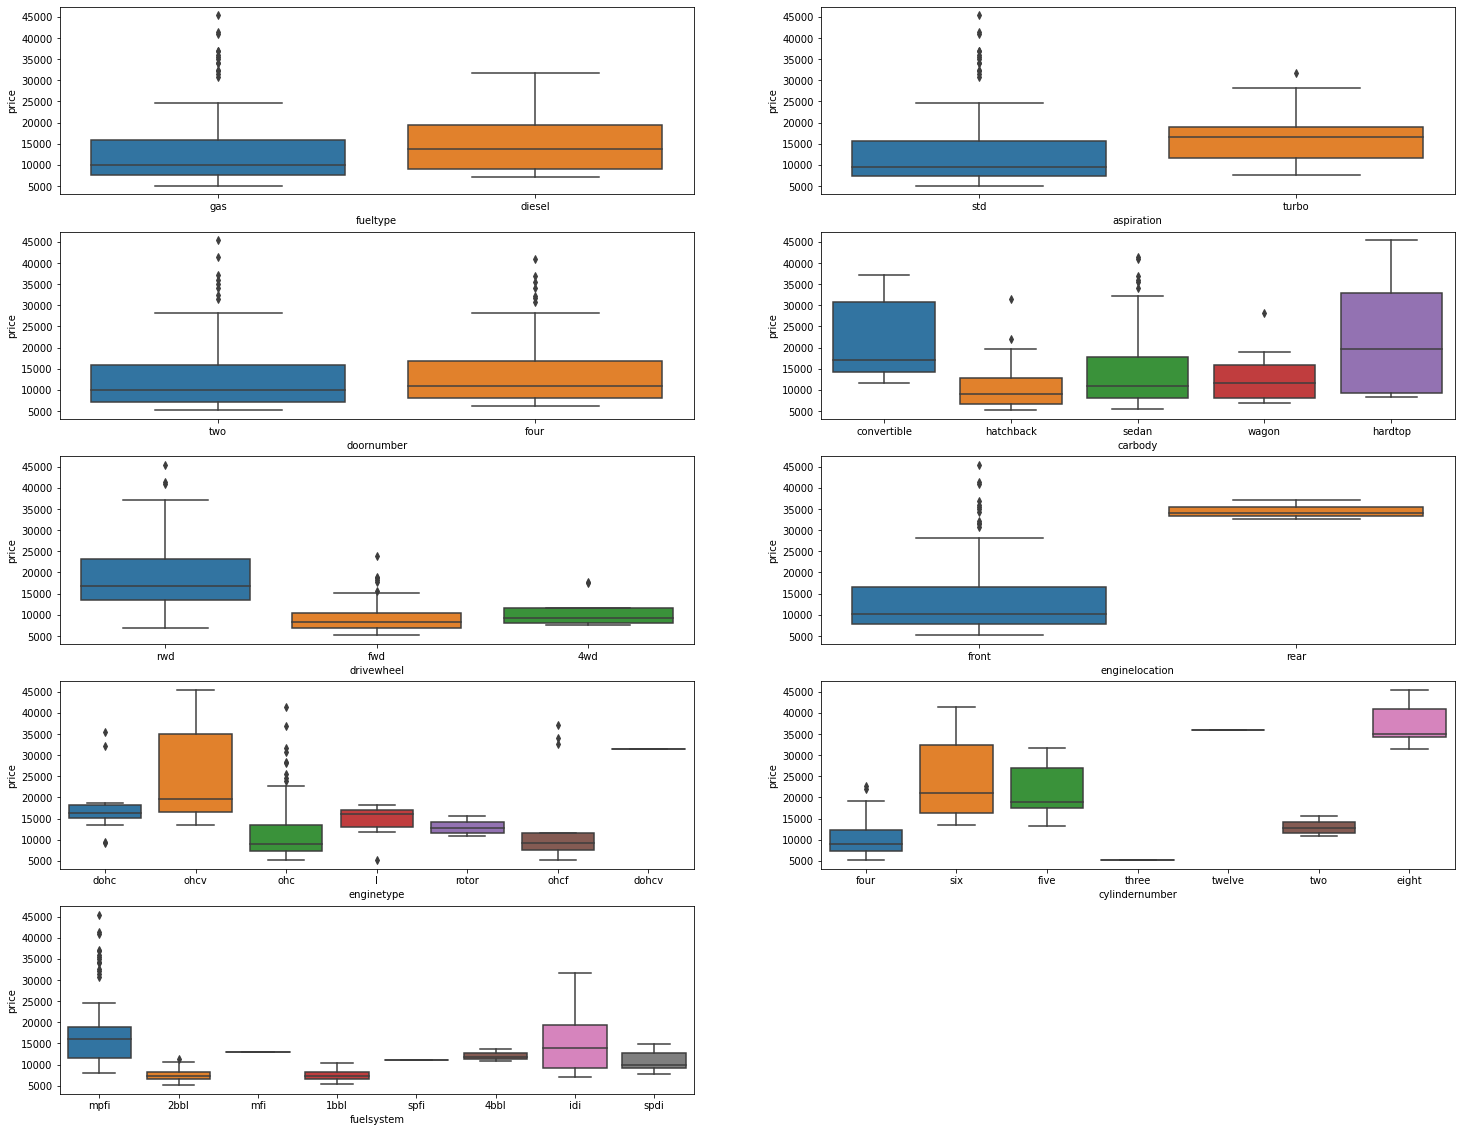

In [26]:
#Box plot for Categorical data
plt.figure(figsize=(25, 20))
#plt.subplot(5,2,1)
#sns.boxplot(x = 'CompanyName', y = 'price', data = carprice) - > taking this a Separte plot as unable to fit the names

plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(5,2,3)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(5,2,4)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(5,2,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(5,2,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(5,2,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(5,2,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(5,2,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

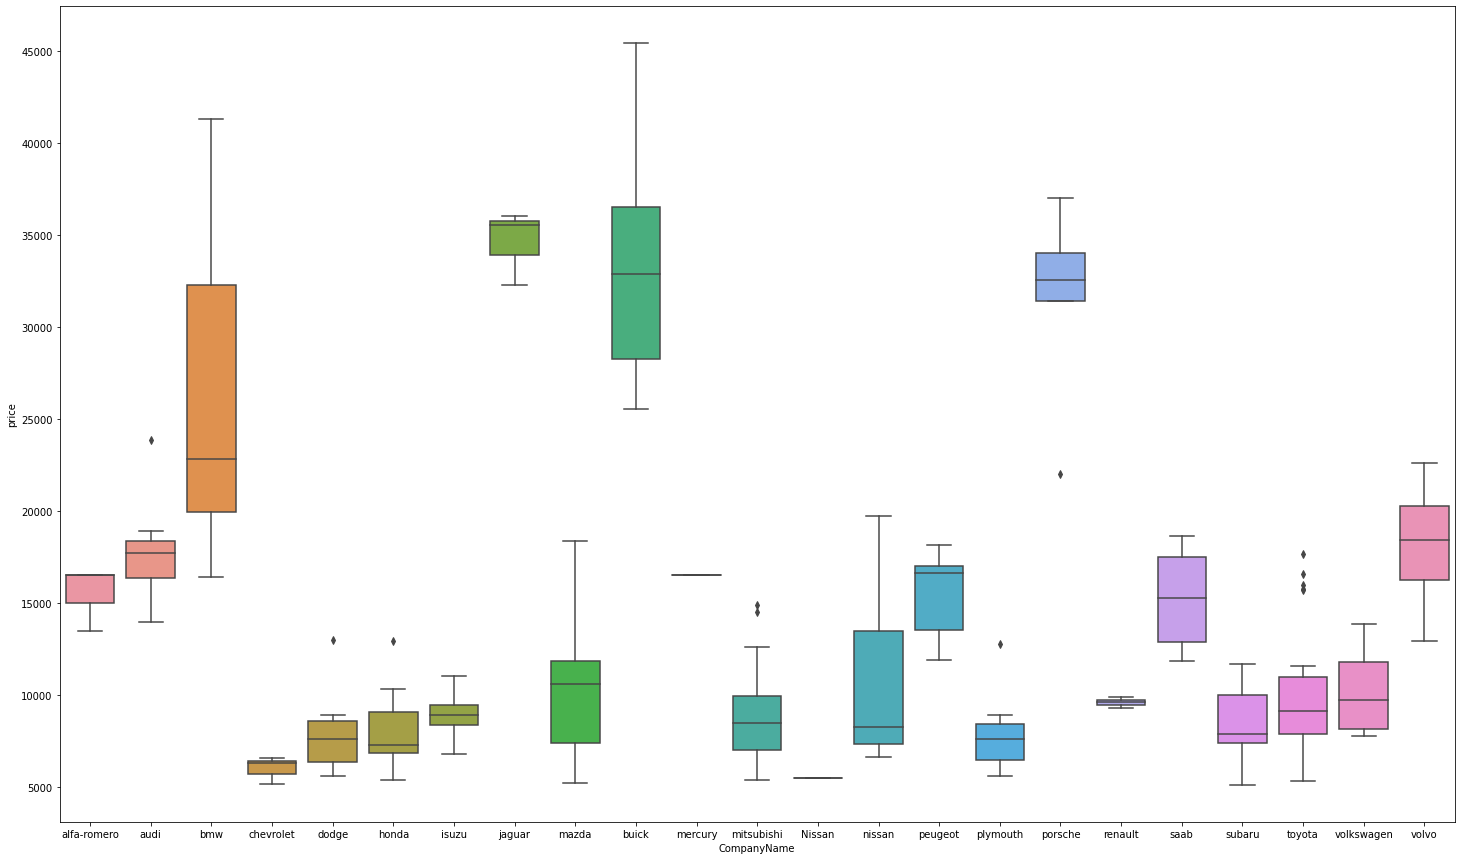

In [27]:
#Box Plot for company name and Price
plt.figure(figsize = (25, 15))
sns.boxplot(x = 'CompanyName', y = 'price', data = carprice)
plt.show()

In [28]:
carprice.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### From above plot we are able to understand what are the cataogorical features
 
 1.Company Name - 23 Vales values
 
 2.fueltype -  2 values
 
 3.aspiration - 2 Value
 
 4.doornumber - 2 values
 
 5.carbody   - 5 Values 
 
 6.drivewheel  -  3 Values
 
 7.enginelocation - 2 Levels
 
 8.enginetype - 7 values
 
 9.cylindernumber - 7 Values
 
 10.fuelsystem - 8 Levels

# Data Prepartion 
   ### From above data visuals we are going to merge and adding dummy variables 
   

In [29]:
# Merging few catogrical varibales in single feature and adding new feature
# Based on the car price and car compnay adding the car Category 
carprice['price'] = carprice['price'].astype('int')
temp = carprice.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
carprice['CarCategory'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
carprice.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCategory
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


In [30]:
#Adding mileage as single colume taking the weighted average of 55% city and 45% highways.
carprice['Milege'] = (0.55 * carprice['citympg']) + (0.45 * carprice['highwaympg'])
drop_list = ["citympg","highwaympg"]
carprice.drop(drop_list,axis=1,inplace=True)

In [31]:
carprice.head()

,CompanyName,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,CarCategory,Milege
0,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,Medium,23.70
1,alfa-romero,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,Medium,23.70
2,alfa-romero,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,Medium,22.15
3,audi,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,Medium,26.70
4,audi,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,Medium,19.80


## Below are the sigificant features identified finally post Data visualizatuion and Data prepartion

- CarCateogry 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Mileage

In [32]:
# adding Features to new data frame
cars_lr = carprice[['CarCategory','price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'Milege', 'carlength','carwidth']]
cars_lr.head()

,CarCategory,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,Milege,carlength,carwidth
0,Medium,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,Medium,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,Medium,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,Medium,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,Medium,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


In [33]:
# Adding dummmy variables 

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('CarCategory',cars_lr)
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Milege,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [34]:
carprice.shape

(205, 25)

In [35]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CompanyName       205 non-null    object  
 1   symboling         205 non-null    int64   
 2   fueltype          205 non-null    object  
 3   aspiration        205 non-null    object  
 4   doornumber        205 non-null    object  
 5   carbody           205 non-null    object  
 6   drivewheel        205 non-null    object  
 7   enginelocation    205 non-null    object  
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    object  
 14  cylindernumber    205 non-null    object  
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

### Model Building

In [36]:
# Required SKlearn added in Lib
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr ,train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_train.shape

(143, 31)

In [38]:
df_test.shape

(62, 31)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       143 non-null    int64  
 1   wheelbase   143 non-null    float64
 2   curbweight  143 non-null    int64  
 3   enginesize  143 non-null    int64  
 4   boreratio   143 non-null    float64
 5   horsepower  143 non-null    int64  
 6   Milege      143 non-null    float64
 7   carlength   143 non-null    float64
 8   carwidth    143 non-null    float64
 9   gas         143 non-null    uint8  
 10  turbo       143 non-null    uint8  
 11  hardtop     143 non-null    uint8  
 12  hatchback   143 non-null    uint8  
 13  sedan       143 non-null    uint8  
 14  wagon       143 non-null    uint8  
 15  fwd         143 non-null    uint8  
 16  rwd         143 non-null    uint8  
 17  dohcv       143 non-null    uint8  
 18  l           143 non-null    uint8  
 19  ohc         143 non-null    u

In [40]:
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler()

#Going to scale below features using Min_max
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','Milege']
df_train[num_vars] = sclr.fit_transform(df_train[num_vars])
df_test[num_vars] = sclr.fit_transform(df_test[num_vars])



In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       143 non-null    float64
 1   wheelbase   143 non-null    float64
 2   curbweight  143 non-null    float64
 3   enginesize  143 non-null    float64
 4   boreratio   143 non-null    float64
 5   horsepower  143 non-null    float64
 6   Milege      143 non-null    float64
 7   carlength   143 non-null    float64
 8   carwidth    143 non-null    float64
 9   gas         143 non-null    uint8  
 10  turbo       143 non-null    uint8  
 11  hardtop     143 non-null    uint8  
 12  hatchback   143 non-null    uint8  
 13  sedan       143 non-null    uint8  
 14  wagon       143 non-null    uint8  
 15  fwd         143 non-null    uint8  
 16  rwd         143 non-null    uint8  
 17  dohcv       143 non-null    uint8  
 18  l           143 non-null    uint8  
 19  ohc         143 non-null    u

In [42]:
y_train = df_train.pop('price')
X_train = df_train

In [43]:
# Finding RFE

from sklearn.preprocessing import LabelEncoder


#RFE Libs already imported
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with 15 output variables.
rfe = RFE(lm, 10)
rfe = rfe.fit (X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('Milege', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [45]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'horsepower', 'Milege', 'carwidth', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

### Above Features are slecetd by RFE

### Model 1

In [46]:
# Selectingh RFE slecetd coloumns in 
X_train_RFE = X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm  

X_train_RFE = sm.add_constant(X_train_RFE)
lm = sm.OLS(y_train,X_train_RFE).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.29e-70
Time:                        07:33:11   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0947      0.042     -2.243      0.0

In [49]:
# Calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,71.51
1,curbweight,8.38
6,sedan,6.18
2,horsepower,5.94
5,hatchback,5.68
4,carwidth,5.19
3,Milege,3.74
7,wagon,3.62
8,dohcv,1.73
10,Highend,1.68


### From P Vlaue we could see twelve having high P Value so dropping

## Model 2

In [50]:
X_train_Modle1 = X_train_RFE.drop(["twelve"], axis = 1)

In [51]:
X_train_RFE = sm.add_constant(X_train_Modle1)
lm = sm.OLS(y_train,X_train_Modle1).fit()

In [52]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           4.25e-71
Time:                        07:33:11   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0764      0.041     -1.851      0.0

In [53]:
# Calculating VIF for model 1

vif = pd.DataFrame()
vif['Features'] = X_train_Modle1.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle1.values, i) for i in range(X_train_Modle1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.23
1,curbweight,8.33
6,sedan,6.13
5,hatchback,5.67
4,carwidth,5.19
2,horsepower,5.06
7,wagon,3.58
3,Milege,3.56
9,Highend,1.68
8,dohcv,1.62


### From P Vlaue we could see Milage having high P Value hence dropping

## Model 3

In [54]:
X_train_Modle2 = X_train_Modle1.drop(["Milege"], axis = 1)

In [55]:
X_train_Modle2 = sm.add_constant(X_train_Modle2)
lm = sm.OLS(y_train,X_train_Modle2).fit()

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           7.85e-72
Time:                        07:33:11   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [57]:
# Calculating VIF for model 2

vif = pd.DataFrame()
vif['Features'] = X_train_Modle2.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle2.values, i) for i in range(X_train_Modle2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


### From P Vlaue we could see Sedan having high P Value hence dropping

## Model 3


In [58]:
X_train_Modle3 = X_train_Modle2.drop(["sedan"], axis = 1)

In [59]:
X_train_Modle3= sm.add_constant(X_train_Modle3)
lm = sm.OLS(y_train,X_train_Modle3).fit()

In [60]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           2.56e-71
Time:                        07:33:11   Log-Likelihood:                 198.86
No. Observations:                 143   AIC:                            -381.7
Df Residuals:                     135   BIC:                            -358.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0881      0.017     -5.151      0.0

In [61]:
# Calculating VIF for model 3
vif = pd.DataFrame()
vif['Features'] = X_train_Modle3.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle3.values, i) for i in range(X_train_Modle3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.89
1,curbweight,8.09
3,carwidth,4.94
2,horsepower,3.52
7,Highend,1.63
6,dohcv,1.46
4,hatchback,1.27
5,wagon,1.27


### From P Vlaue we have a good Const so now we go with VIF to drop values (curbweight	8.09)

## Model 3

In [62]:
X_train_Modle4 = X_train_Modle3.drop(["curbweight"], axis = 1)


In [63]:
X_train_Modle4= sm.add_constant(X_train_Modle4)
lm = sm.OLS(y_train,X_train_Modle4).fit()

In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.68e-69
Time:                        07:33:11   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [65]:
# Calculating VIF for model 4
vif = pd.DataFrame()
vif['Features'] = X_train_Modle4.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle4.values, i) for i in range(X_train_Modle4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


### From P Vlaue we have wagon as High P value will drop it

## Model 5

In [66]:
X_train_Modle5 = X_train_Modle4.drop(["wagon"], axis = 1)

X_train_Modle5= sm.add_constant(X_train_Modle5)
lm = sm.OLS(y_train,X_train_Modle5).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           1.57e-70
Time:                        07:33:11   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [67]:
# Calculating VIF for model 5
vif = pd.DataFrame()
vif['Features'] = X_train_Modle5.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle5.values, i) for i in range(X_train_Modle5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


### From P Vlaue we have hatchback as High P value will drop it

## Model 6

In [68]:
X_train_Modle6= X_train_Modle5.drop(["hatchback"], axis = 1)

X_train_Modle6= sm.add_constant(X_train_Modle6)
lm = sm.OLS(y_train,X_train_Modle6).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.9
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           3.26e-70
Time:                        07:33:11   Log-Likelihood:                 187.05
No. Observations:                 143   AIC:                            -364.1
Df Residuals:                     138   BIC:                            -349.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.016     -7.239      0.0

In [69]:
vif = pd.DataFrame()
vif['Features'] = X_train_Modle6.columns
vif['VIF'] = [variance_inflation_factor(X_train_Modle6.values, i) for i in range(X_train_Modle6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.51
1,horsepower,2.33
2,carwidth,1.96
4,Highend,1.50
3,dohcv,1.18


## Residual Analysis of the train data

In [70]:
#Predcting Y Train
lm = sm.OLS(y_train,X_train_Modle6).fit()
y_train_price = lm.predict(X_train_Modle6)

Text(0.5, 0, 'Errors')

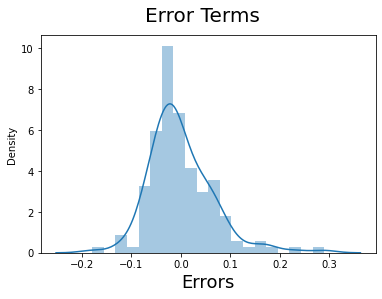

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

In [72]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [73]:
# Now let's use our model to make predictions.
X_train_Modle6= X_train_Modle6.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_Modle6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [74]:
y_test_pred = lm.predict(X_test_new)

In [75]:
#Chekcking R2 Score for test
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_pred)

0.8250052065076305

## Model Evaluation

Text(0, 0.5, 'y_pred')

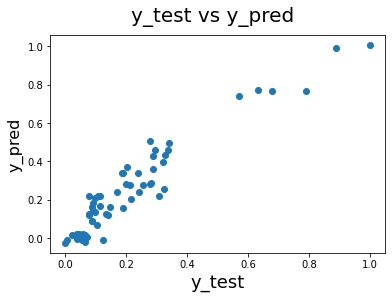

In [76]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## From Above Model Evaluation we could calculate below R score for test and Train

In [77]:
print("Train R2 Score")
print(r2_score(y_train, y_train_price))
print("\n Test R2 Score")
print(r2_score(y_test, y_test_pred))

Train R2 Score
0.9073564229635502

 Test R2 Score
0.8250052065076305


In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     337.9
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           3.26e-70
Time:                        07:33:12   Log-Likelihood:                 187.05
No. Observations:                 143   AIC:                            -364.1
Df Residuals:                     138   BIC:                            -349.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1176      0.016     -7.239      0.0

# Inference:

## We can see that the equation of our best fitted line is:

$ price = -0.1176 + 0.4792 \times  horsepower + 0.4241  \times  carwidth + (-0.3512) \times dohcv(Engine Type) + 0.2916\times Highend(Higend Model) $